## Clustering project

In [1]:
# Dataset Link
# https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view
# Problem 1:
# There are various stocks for which we have collected a data set, which all stocks are
# apparently similar in performance
# Problem 2:
# How many Unique patterns that exist in the historical stock data set, based on
# fluctuations in price.
# Problem 3:
# Identify which all stocks are moving together and which all stocks are different from
# each other.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("data_stocks.csv")
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
data.shape

(41266, 502)

In [5]:
dataCopy = data.copy()
dataCopy.drop(['DATE','SP500'], inplace=True, axis=1)
dataCopy.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
#which all stocks are apparently similar in performance

In [7]:
corr = dataCopy.corr()
dataCorr = pd.DataFrame(data = corr.values, columns=corr.index, index=corr.index)
dataCorr.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213


In [8]:
dataCorr[dataCorr['NASDAQ.AAL'].values > 0.80][:10]

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AMZN,0.803319,0.370111,0.730719,0.386619,0.252712,0.828757,-0.648854,0.059345,0.897693,0.170978,...,0.879967,-0.733852,0.530139,0.804398,-0.203979,0.533584,0.503878,0.793529,0.419472,0.872246
NASDAQ.EXPE,0.812206,0.379622,0.818384,0.218189,0.369697,0.834440,-0.707045,0.296553,0.817588,0.199334,...,0.931258,-0.825230,0.591514,0.859042,-0.368192,0.712184,0.658203,0.883902,0.347660,0.913009
NASDAQ.HAS,0.832713,-0.274890,0.251696,0.252954,-0.030201,0.394658,-0.206013,-0.208923,0.530874,0.258187,...,0.698866,-0.609800,0.035341,0.625126,0.264187,0.306630,0.055201,0.406760,0.839854,0.651842
NYSE.CMI,0.810391,0.088336,0.528227,0.206259,0.179664,0.577301,-0.458993,0.140823,0.690999,0.184153,...,0.803020,-0.677137,0.226787,0.767652,-0.003402,0.521924,0.370814,0.616157,0.581472,0.753369
NYSE.COH,0.837497,0.161166,0.476242,0.257488,0.111937,0.632158,-0.575362,-0.061769,0.698357,0.040742,...,0.785964,-0.622571,0.270847,0.718301,0.088650,0.407912,0.305606,0.624507,0.488613,0.785750
NYSE.CSRA,0.803510,0.334035,0.832643,0.154026,0.497718,0.768976,-0.616766,0.386223,0.696207,0.346399,...,0.837405,-0.927944,0.649768,0.877170,-0.446198,0.843635,0.770891,0.878215,0.308781,0.810754
NYSE.DAL,0.908578,-0.016610,0.452003,0.194325,0.012064,0.537964,-0.444039,-0.056278,0.628435,0.170080,...,0.776583,-0.736920,0.200001,0.750989,0.051927,0.469302,0.278065,0.610742,0.662851,0.787479
NYSE.DE,0.850040,0.305125,0.677498,0.282661,0.463447,0.787228,-0.649532,0.083421,0.710929,0.205290,...,0.834250,-0.820615,0.571294,0.805954,-0.210496,0.630953,0.587302,0.802758,0.304364,0.809627
NYSE.FBHS,0.816213,-0.126611,0.429645,0.011530,0.310310,0.402018,-0.212418,0.279779,0.465293,0.404898,...,0.772558,-0.655985,0.099429,0.801572,0.020292,0.587787,0.347267,0.497662,0.644646,0.589896


In [9]:
# How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

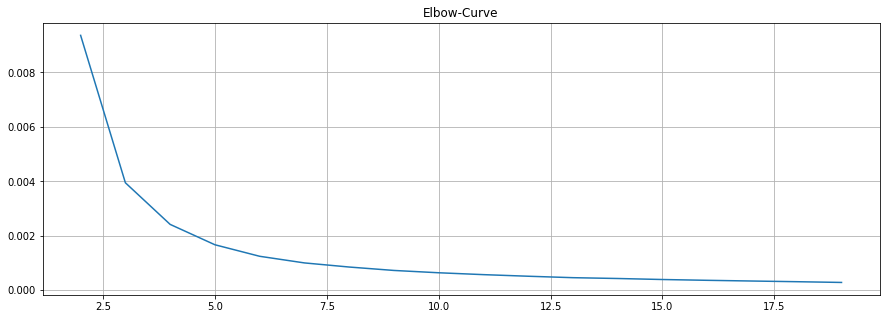

In [10]:
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = data.pct_change().std()*sqrt(252)

dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

X = dta
distortions =[]
for k in range(2,20):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20),distortions)
plt.grid(True)
plt.title('Elbow-Curve')
plt.show()

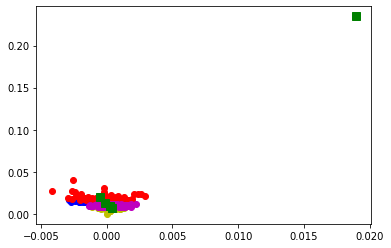

In [11]:
from pylab import plot, show
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [12]:
print(returns.idxmax())

Returns    NYSE.XRX
dtype: object


In [13]:
returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns.Volatility = data.pct_change().std()*sqrt(252)

dta = np.asarray([np.asarray(returns.Returns), np.asarray(returns.Volatility)]).T

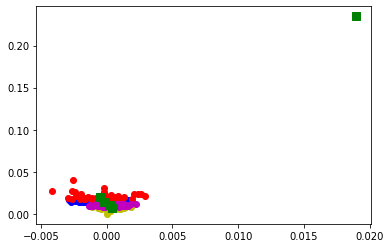

In [14]:
# Computing kmeans with K =5 (5 clusters)
centroids,_= kmeans(dta, 5)
# Assign each sample to a cluster
idx,_ = vq(dta, centroids)

# some plotting using numpy's logical indexing
plot(dta[idx==0,0],dta[idx==0,1],'ob',
     dta[idx==1,0],dta[idx==1,1],'oy',
     dta[idx==2,0],dta[idx==2,1],'or',
     dta[idx==3,0],dta[idx==3,1],'og',
     dta[idx==4,0],dta[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [15]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
details[:5]

[('DATE', 1),
 ('SP500', 1),
 ('NASDAQ.AAL', 0),
 ('NASDAQ.AAPL', 4),
 ('NASDAQ.ADBE', 4)]

In [16]:
df = pd.DataFrame(details, columns=['Stock_Name','Cluster_No'])
df.Cluster_No.value_counts()

4    197
1    137
0    126
2     41
3      1
Name: Cluster_No, dtype: int64

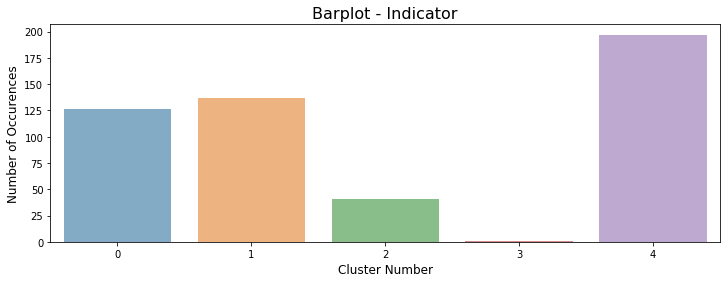

In [17]:
import seaborn as sns
ind = df.Cluster_No.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=ind.index, y=ind.values, alpha=0.6)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Cluster Number',fontsize=12)
plt.title('Barplot - Indicator',fontsize =16)
plt.show()

In [18]:
# Identify which all stocks are moving together and which all stocks are different from each other

In [19]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [20]:
dt = data.copy()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# convert data into numpy arrays
X = dt.values

# Scaling the values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=150)
pca.fit(X_scaled)

# the amount of variance that each PCA explains
var = pca.explained_variance_ratio_

# cumulative varince explains
var1 = np.cumsum(np.round(var, decimals=4)*100)
print(var1)

[47.21 64.38 76.35 81.19 84.99 87.79 89.78 91.08 92.13 92.88 93.56 94.14
 94.6  95.05 95.45 95.79 96.12 96.38 96.61 96.83 97.02 97.18 97.33 97.46
 97.59 97.71 97.82 97.92 98.01 98.09 98.17 98.25 98.32 98.39 98.45 98.51
 98.57 98.62 98.67 98.72 98.76 98.8  98.84 98.88 98.92 98.95 98.98 99.01
 99.04 99.07 99.1  99.13 99.16 99.18 99.2  99.22 99.24 99.26 99.28 99.3
 99.32 99.34 99.36 99.38 99.4  99.42 99.44 99.46 99.47 99.48 99.49 99.5
 99.51 99.52 99.53 99.54 99.55 99.56 99.57 99.58 99.59 99.6  99.61 99.62
 99.63 99.64 99.65 99.66 99.67 99.68 99.69 99.7  99.71 99.72 99.73 99.74
 99.75 99.76 99.77 99.78 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79]


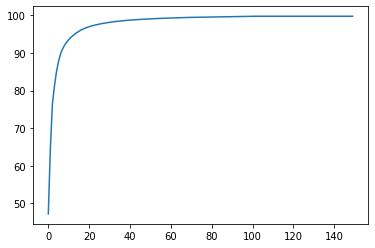

In [21]:
plt.plot(var1)

In [22]:
pca = PCA(n_components =25)
X1 = pca.fit_transform(X_scaled)
print(X1)

[[ 25.64715405   9.99154156  -9.39834667 ...   0.5485857    0.09924326
    2.42696204]
 [ 25.74447983   9.87809253  -9.81874458 ...   0.45026656   0.18323802
    2.32228594]
 [ 25.66169481   9.81134664  -9.69151393 ...   0.52671346   0.05539508
    2.06434941]
 ...
 [-22.85875597  13.3380181    6.56057045 ...  -2.15277316   1.18848472
   -0.29855727]
 [-22.7057793   13.42820228   6.67321908 ...  -2.13851136   1.19460132
   -0.32376139]
 [-22.81349985  13.37277083   6.60186059 ...  -2.17570066   1.17444559
   -0.28369704]]


In [23]:
print('Number of PCA :',len(pca.components_))
print(abs(pca.components_))

Number of PCA : 25
[[0.0641156  0.06100625 0.03912755 ... 0.06222908 0.00249839 0.05149673]
 [0.01345954 0.01783581 0.06428133 ... 0.02036739 0.08124665 0.05945237]
 [0.00025705 0.01368982 0.03976455 ... 0.02109326 0.06630168 0.02367399]
 ...
 [0.00183944 0.00031144 0.01161409 ... 0.0117834  0.04441298 0.01197758]
 [0.00151818 0.00085999 0.07417677 ... 0.00125445 0.01811253 0.04813279]
 [0.0137377  0.01737476 0.0218683  ... 0.00470121 0.0208404  0.02527675]]


In [24]:
comp = pd.DataFrame(pca.components_, columns = dt.columns)
comp.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.064116,-0.061006,-0.039128,-0.040896,-0.062662,-0.009756,-0.035746,-0.054455,0.050145,-0.035261,...,-0.049236,0.056778,-0.054394,-0.050423,0.046987,-0.057669,-0.061151,-0.062229,0.002498,-0.051497
1,0.013460,-0.017836,-0.064281,0.033885,0.001886,-0.032434,0.043464,-0.029479,0.016120,0.058259,...,-0.058924,0.030252,0.013685,-0.040764,-0.052832,0.010248,0.031474,-0.020367,-0.081247,-0.059452
2,0.000257,-0.013690,-0.039765,0.064156,0.012142,0.043281,-0.037260,0.040575,-0.053959,-0.051098,...,-0.003135,0.022023,0.059652,-0.034497,-0.028736,-0.038999,-0.004302,0.021093,-0.066302,0.023674
3,-0.000057,0.011872,0.007578,0.077207,0.008521,-0.027793,-0.017217,0.009008,-0.032168,0.034345,...,0.021719,0.060973,-0.039576,0.027646,0.012222,-0.039697,0.002869,-0.002750,-0.049440,0.015092
4,0.015223,-0.054586,-0.032856,-0.016822,0.002549,-0.038383,-0.101752,-0.034551,-0.011474,0.037572,...,-0.036346,-0.011499,-0.030356,-0.011622,-0.045632,0.029278,-0.002911,-0.001172,-0.003602,0.005618
